#  Targeted Boundary Attack on Logistic Regression Model (German Credit Dataset)

In [1]:
from art.attacks.evasion import BoundaryAttack
from art.estimators.classification import SklearnClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import joblib
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

C:\Users\baberra\AppData\Local\anaconda3\Lib\site-packages\art\estimators\certification\__init__.py:30: UserWarning: PyTorch not found. Not importing DeepZ or Interval Bound Propagation functionality
  warnings.warn("PyTorch not found. Not importing DeepZ or Interval Bound Propagation functionality")


In [2]:
# Load the trained model and test data (Ensure the model/data were saved in previous training notebook)
model = joblib.load("../../../../saved_models/credit_scoring_model_german_dataset---logistic_regression.joblib")
X_test = joblib.load("../../../../saved_models/credit_scoring_model_german_dataset---logistic_regression-X_test.joblib")
y_test = joblib.load("../../../../saved_models/credit_scoring_model_german_dataset---logistic_regression-y_test.joblib")

In [3]:
# Wrap model with ART SklearnClassifier with `clip_values` and use_logits=True
art_classifier = SklearnClassifier(
    model=model,
    use_logits=True,  # Enables using model.decision_function() instead of predict_proba
    clip_values=(X_test.min().min(), X_test.max().max())
)

In [4]:
# Evaluate on clean examples
y_pred_clean = art_classifier.predict(X_test.to_numpy())
y_pred_clean_labels = np.argmax(y_pred_clean, axis=1)
acc_clean = accuracy_score(y_test, y_pred_clean_labels)
cm_clean = confusion_matrix(y_test, y_pred_clean_labels)

In [5]:
# === Boundary Attack ===
boundary = BoundaryAttack(
    estimator=art_classifier,
    targeted=True,    #  Targeted attack: Force the model to output a specific label chosen by the attacker. True label: "Loan Approved", Attacker’s target: "Loan Rejected"
    step_adapt=0.9,
    max_iter=1000,     # per-sample maximum iterations (reduce to speed up)
    delta=0.01,        # initial step size for proposals
    epsilon=0.01       # orthogonal step size
)

# Suppose the attacker wants all inputs to be classified as "Loan Rejected"
# If your labels are one-hot encoded:
target_class_index = 0  # e.g., class index for "Loan Rejected"

# Create a 1D array of the same length as X_test with all values = target_class_index
y_target = np.full(shape=(len(X_test),), fill_value=target_class_index)

# Now generate adversarial examples with target labels
X_test_adv = boundary.generate(x=X_test.values, y=y_target)
# Use .values to convert DataFrame to NumPy array
#X_test_adv = boundary.generate(x=X_test.values)

Boundary attack:   0%|          | 0/200 [00:00<?, ?it/s]

Boundary attack - iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

Boundary attack - iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

Boundary attack - iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

Boundary attack - iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

Boundary attack - iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

Boundary attack - iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

Boundary attack - iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

Boundary attack - iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

Boundary attack - iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

Boundary attack - iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

Boundary attack - iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

Boundary attack - iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

Boundary attack - iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

Boundary attack - iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

Boundary attack - iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

Boundary attack - iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

Boundary attack - iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

Boundary attack - iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

Boundary attack - iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

Boundary attack - iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

Boundary attack - iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

Boundary attack - iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

Boundary attack - iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

Boundary attack - iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

Boundary attack - iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

Boundary attack - iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

Boundary attack - iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

Boundary attack - iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

Boundary attack - iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

Boundary attack - iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

Boundary attack - iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

Boundary attack - iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

Boundary attack - iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

Boundary attack - iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

Boundary attack - iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

Boundary attack - iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

In [6]:
# Evaluate the model on adversarial examples
y_pred_adv = art_classifier.predict(X_test_adv)
y_pred_adv_labels = np.argmax(y_pred_adv, axis=1)

acc_adv = accuracy_score(y_test, y_pred_adv_labels)
cm_adv = confusion_matrix(y_test, y_pred_adv_labels)
report = classification_report(y_test, y_pred_adv_labels)

# Compare performance
print(f"Accuracy on Clean Examples: {acc_clean:.4f}")
print(f"Accuracy on Adversarial Examples: {acc_adv:.4f}")
print(f"Attack Success Rate: {(acc_clean - acc_adv) / acc_clean * 100:.2f}%")
print("\nClassification Report on Adversarial Examples:\n", report)

# Check Perturbation Magnitude
perturbation = np.mean(np.abs(X_test_adv - X_test.values))
print("Average Perturbation per Feature:", perturbation)

Accuracy on Clean Examples: 0.7300
Accuracy on Adversarial Examples: 0.7000
Attack Success Rate: 4.11%

Classification Report on Adversarial Examples:
               precision    recall  f1-score   support

           0       0.70      1.00      0.82       140
           1       0.00      0.00      0.00        60

    accuracy                           0.70       200
   macro avg       0.35      0.50      0.41       200
weighted avg       0.49      0.70      0.58       200

Average Perturbation per Feature: 0.0061230014942041215


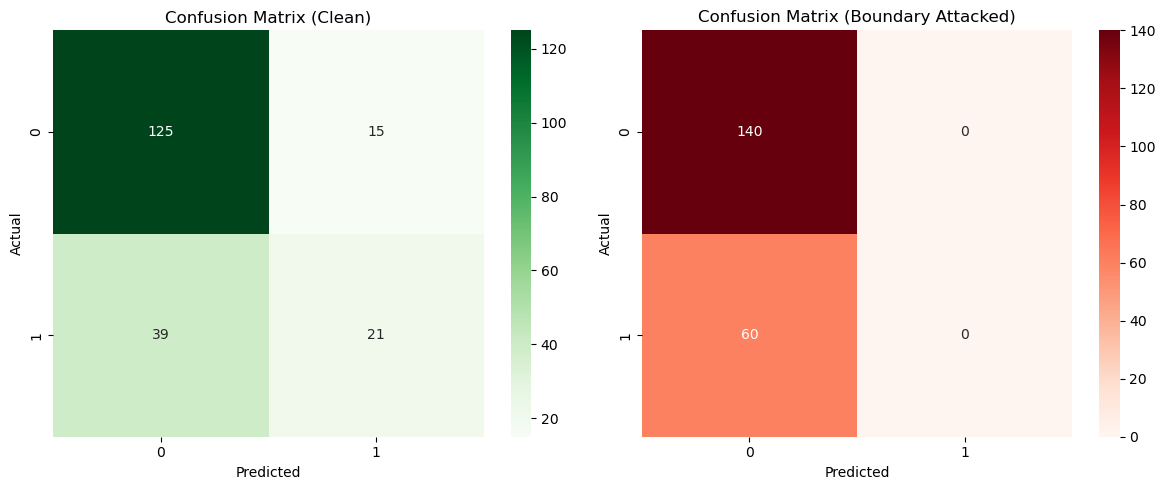

In [7]:
# Plot Confusion Matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(cm_clean, annot=True, fmt='d', cmap="Greens", ax=axes[0])
axes[0].set_title("Confusion Matrix (Clean)")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

sns.heatmap(cm_adv, annot=True, fmt='d', cmap="Reds", ax=axes[1])
axes[1].set_title("Confusion Matrix (Boundary Attacked)")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

plt.tight_layout()
plt.show()

In [8]:
# Sample Predictions on Adversarial Examples
X_test_sample = X_test.copy()
results_df = X_test_sample.copy()
results_df['Actual'] = y_test.values
results_df['Predicted'] = y_pred_adv_labels
results_df['Correct'] = results_df['Actual'] == results_df['Predicted']

columns_to_show = ['Actual', 'Predicted', 'Correct', 'Age', 'Credit amount', 'Duration',
                   'Job_1', 'Job_2', 'Job_3', 'Housing_own', 'Housing_rent']
results_df_subset = results_df[columns_to_show]

print("\nRandom Sample Predictions:")
results_df_subset.sample(10, random_state=42)


Random Sample Predictions:


,Actual,Predicted,Correct,Age,Credit amount,Duration,Job_1,Job_2,Job_3,Housing_own,Housing_rent
662,0,0,True,1.329562,-0.355028,0.019475,False,True,False,True,False
430,0,0,True,3.503789,0.096714,-1.335316,True,False,False,True,False
551,0,0,True,0.876598,-0.538794,-1.250642,True,False,False,True,False
263,0,0,True,1.963712,-0.165274,-0.742595,True,False,False,False,False
347,0,0,True,-1.116443,0.212738,0.273499,False,False,False,False,True
89,1,0,False,-0.663479,-0.779075,-0.742595,False,True,False,True,False
141,0,0,True,-0.482293,0.600855,1.289592,False,False,True,True,False
563,1,0,False,0.151856,3.443052,1.289592,False,True,False,False,False
28,0,0,True,-0.119922,-0.289905,-1.165967,False,True,False,True,False
933,0,0,True,0.604820,-0.998396,-0.742595,False,True,False,True,False
